# Assignment 1

## Exploring data in Python

For this assignment I have provided a portion of the data from the [Institute of Museum and Library Services ](https://www.kaggle.com/datasets/imls/museum-directory) dataset. I've cleaned it up abit!

The assignment asks you to explore the data and provide some analysis and visualisations. It will mostly ask you to use approaches to data analysis and access that we have seen before, but also may involve doing a bit of further research into libraries like NumPy and MatplotLib.

Complete your answers in this Jupyter Notebook, highlighting which cell answers each question.

I have provided some code to load in and format the dataset, run this once at the beginning!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
#dataset adapted from https://www.kaggle.com/datasets/imls/museum-directory
file = open('data/museums_parsed.tsv')
dataset = np.loadtxt(file, delimiter = "\t",  dtype = 'O')
headings = dataset[0]
dataset = dataset[1:]
dataset[:,3] = [float(x[:-2]) for x in dataset[:,3]]
dataset[:,4] = [float(x[:-2]) for x in dataset[:,4]]
dataset[:,5] = [float(x[:-2]) for x in dataset[:,5]]
dataset[:,6] = [float(x[:-2]) for x in dataset[:,6]]

In [3]:
headings

array(['Museum Name', 'Legal Name', 'Museum Type', 'Latitude',
       'Longitude', 'Income', 'Revenue'], dtype=object)

In [4]:
dataset[0]

array(['ALASKA AVIATION HERITAGE MUSEUM',
       'ALASKA AVIATION HERITAGE MUSEUM', 'HISTORY MUSEUM', 61.179,
       -149.972, 602912.0, 550236.0], dtype=object)

## Q1

How many museums have the same legal name and museum name?

In [5]:
same_name_count = np.sum(dataset[:, 0] == dataset[:, 1])

print("Number of museums with the same legal name and museum name:", same_name_count)

Number of museums with the same legal name and museum name: 9313


## Q2

What is the most common type of museum? What percentage of the total items to they make up?

**HINT** What kind of ``Average`` is ``most common`` another word for?


In [6]:

museum_types, type_counts = np.unique(dataset[:, 2], return_counts=True)
#print(museum_types,type_counts)

most_common_type = museum_types[np.argmax(type_counts)]
most_common_type_count = np.max(type_counts)

total_count = len(dataset)
percentage_most_common = (most_common_type_count / total_count) * 100

print("Most common museum type:", most_common_type)
print("Percentage of total items:", percentage_most_common, "%")

Most common museum type: HISTORIC PRESERVATION
Percentage of total items: 55.57552340731422 %


## Q3

### Part 1

Plot income against revenue for the 1000 most easterly museums.  Pick sensible ticks and labels for the axes, as well as a sensible scale (given the range and outliers in the data).

Each item on the plot should have a different colour or symbol depending on its type as described by the ``museum type`` heading (there are 9 different types) .**EXTRA BONUS** If you can put in a legend mapping museum type to colour.

**HINT** Try using `NumPy Filters` and multiple calls to ``ax.plot()`` to plot each group.

### Part 2

What does this graph tell you about the relationship between revenue and income for institutes in the dataset?

C:\Users\ROG\AppData\Local\Temp\ipykernel_12840\1057866244.py:35: RuntimeWarning: invalid value encountered in log10
  log_revenue= np.log10(revenue+1)


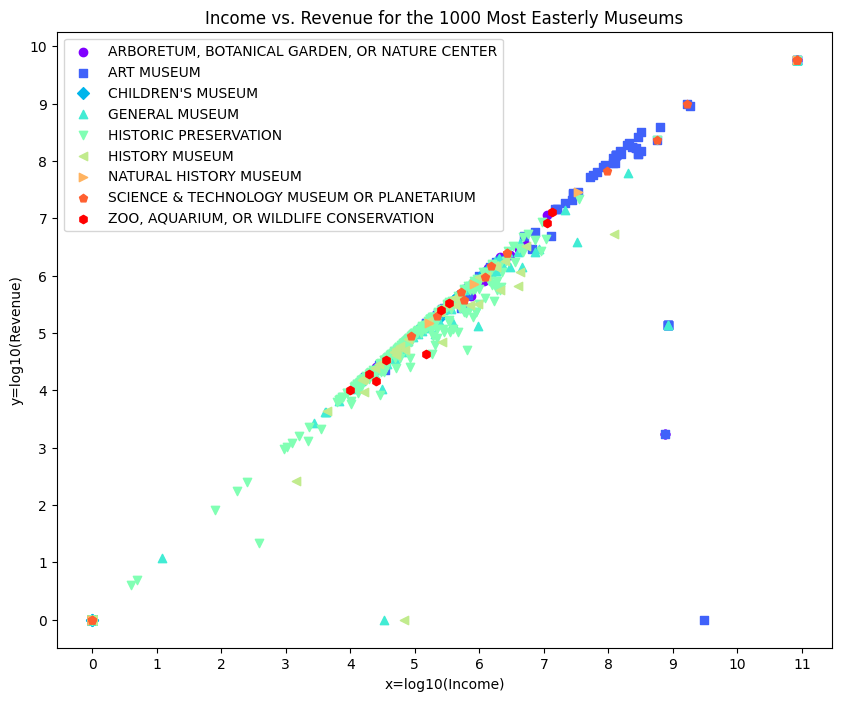

In [40]:
#Part 1

# array 'Museum Name', 'Legal Name', 'Museum Type', 'Latitude','Longitude', 'Income', 'Revenue'
# Filter the 1000 most easterly museums
# Replace the following line with your filtering logic
easterly_museums = dataset

sorted_indices = np.argsort(easterly_museums[:, 4])  # Sort by longitude (longitude is at index 4)
easterly_museums = easterly_museums[sorted_indices[-1000:]]

# print(easterly_museums[:, 4])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Define a color map for each museum type
colors = plt.cm.rainbow(np.linspace(0, 1, len(museum_types)))

# Define a list of markers for each museum type
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h']


# Calculate the maximum income and revenue from all data points
import math
a=max_income = np.max( easterly_museums[:, 5])
b=max_revenue = np.max( easterly_museums[:, 6])
# print(max_income, max_revenue)




income=easterly_museums[:, 5].astype(float)
revenue=easterly_museums[:, 6].astype(float)
log_income= np.log10(income+1)
log_revenue= np.log10(revenue+1)
# print(log_income,log_revenue)

# Loop through each museum type
for i, museum_type in enumerate(museum_types):
    indices = np.where(easterly_museums[:, 2] == museum_type)
    x = log_income[indices]
    y = log_revenue[indices]

    
    # Use a different marker for each type
    marker = markers[i % len(markers)]
    
    ax.scatter(x, y, label=museum_type, color=colors[i], marker=marker)




# Set the tick range and interval

# def calculate_order_of_magnitude(number):
#     # Calculate the order of magnitude (base 10 logarithm)
#     order = int(math.log10(abs(number)))
    
#     return order
# a0 = calculate_order_of_magnitude(a)
# b0 = calculate_order_of_magnitude(b)
#2>log10(a)-a0>1

# set ticks
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])  
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10])  

# #new one ticks
# integer_part = int(a/(10**(a0)))
# integer_part = int(b/(10**(b0)))
# result_array1 = np.arange(0, integer_part + 1, 1)*10**(a0)
# result_array2 = np.arange(0, integer_part + 1, 1)*10**(b0)

# print(result_array1,result_array2)

# new_ticks1 = np.append(result_array1, a)
# new_ticks2 = np.append(result_array2, b)
# ax.set_xticks(new_ticks1)
# ax.set_yticks(new_ticks2)


ax.set_xlabel("x=log10(Income)")
ax.set_ylabel("y=log10(Revenue)")
ax.set_title("Income vs. Revenue for the 1000 Most Easterly Museums")
ax.legend(loc="upper left")

# Display the plot
plt.show()


Part2

Most museums have a balanced income and expenditure, with little to no profit, while only a few art museums make money

## Q4

1. Create a new 1-D array containing the absolute difference between revenue and income for each object. Plot this data as a histogram with 100 bins.

You will see there are a couple of issues we need to address first to make our plots more interprettable. **First**, lots of museums have similar incomes and revenues, meaning the **absolute difference between them is close to zero**. This means the first bin has most of the museums in it and the variation in the latter bins is squished into a small amount of space. **Second**, a few outliers have large differences between them, extending the range of the bins as they are equally spaced out between the top and bottom values. This leaves lots of bins covering a few datapoints at the top.


2. We can address these issues by using a ``log scale`` for the x axis. Pick some appropriately spaced ticks and plot the log histogram with 100 bins. Label the axes appropriately.

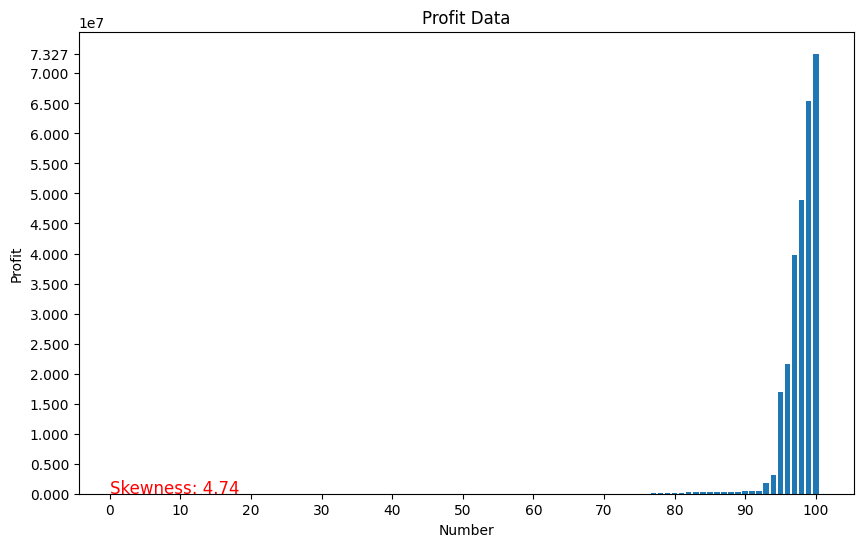

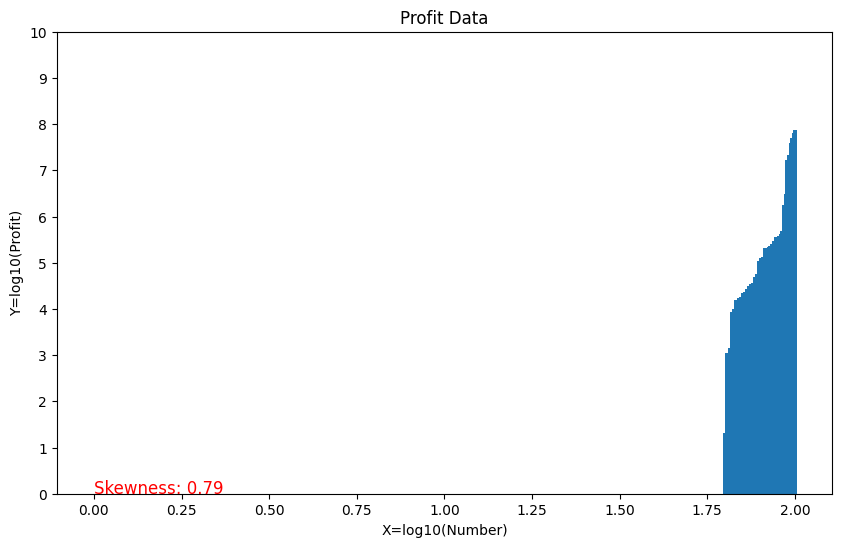

In [8]:
#Q4.1

# Choose 100 random indices
random_indices = np.random.choice(len(dataset), 100, replace=False)

# Get the selected rows from the dataset
random_data = dataset[random_indices]

new_income =random_data[:, 5]
new_revenue=random_data[:, 6]
profit=new_income-new_revenue

# Use 'sort' to sort the 'profit' array in ascending order.
sorted_indices = np.argsort(profit)
sorted_profit = profit[sorted_indices]

# Create a list of unique labels (numbers)
labels = list(range(1, len(profit) + 1))
# Combine the labels with the Profit values
labeled_profit = list(zip(labels, profit))


# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, sorted_profit)


#set ticks
profit_ticksx1 = (0,10,20,30,40,50,60,70,80,90,100)

max_value = np.max(sorted_profit)
def calculate_order_of_magnitude(number):
    # Calculate the order of magnitude (base 10 logarithm)
    order = int(math.log10(abs(number)))
    
    return order
max_value1 = calculate_order_of_magnitude(max_value)

integer_part = int(max_value/(10**(max_value1)))
result_array1 = np.arange(0, integer_part + 0.5, 0.5) * 10 ** max_value1
new_ticks1 = np.append(result_array1, max_value)
# print(max_value,integer_part,result_array1)

# show Skewness
data_skewness = skew(sorted_profit.astype(float))  # Ensure data type is float
plt.text(0.1, 18, f'Skewness: {data_skewness:.2f}', fontsize=12, color='red')

plt.xticks(profit_ticksx1)
plt.yticks(new_ticks1)

# Add labels and title
plt.xlabel("Number")
plt.ylabel("Profit")
plt.title("Profit Data")


# Show the plot
plt.show()

# Q4.2

#Using astype to convert the data into a floating-point number type.
sorted_profit = np.array(sorted_profit).astype(float)
sorted_labels = np.array(labels).astype(float)

#Caculate log
log_profit = np.log10(sorted_profit+1)
log_labels = np.log10(sorted_labels)

# print(log_labels,labels)
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(log_labels, log_profit,width=0.01)

#set ticks
profit_ticksx2 = (0,0.25,0.5,0.75,1,1.25,1.5,1.75,2)
profit_ticksy2 = (0,1,2,3,4,5,6,7,8,9,10)

plt.xticks(profit_ticksx2)
plt.yticks(profit_ticksy2)

# show Skewness

data_skewness = skew(log_profit.astype(float))  # Ensure data type is float
plt.text(0, 0, f'Skewness: {data_skewness:.2f}', fontsize=12, color='red')
# print(log_profit)

# Add labels and title
plt.xlabel("X=log10(Number)")
plt.ylabel("Y=log10(Profit)")
plt.title("Profit Data")

# Show the plot
plt.show()

